In [1]:
import os
os.sys.path
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise
import requests
import numpy as np
import random
import shutil
import glob
import time
import io
from tkinter import ttk
import base64
from imageio import imread,imwrite
import time

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'database_augmented',
 'dataset',
 'final.ipynb',
 'reconstructed.jpg',
 'requiment-install.txt']

In [3]:
os.chdir('dataset')

In [4]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 8CDE-9BE1

 Directory of C:\Users\admin\Documents\MSIS4013\dataset

06/26/2022  03:27 AM    <DIR>          .
06/28/2022  10:03 PM    <DIR>          ..
06/23/2022  03:17 PM    <DIR>          with_mask
06/23/2022  03:17 PM    <DIR>          without_mask
               0 File(s)              0 bytes
               4 Dir(s)  375,240,589,312 bytes free


In [5]:
def Rotate60(img):
  rows,cols,channels= img.shape 
  M = cv2.getRotationMatrix2D((cols/2,rows/2),60,1) 
  rotate_60 = cv2.warpAffine(img,M,(cols,rows)) 
  return rotate_60

In [6]:
def Rotate30(img):
    rows,cols,channels= img.shape 
    M = cv2.getRotationMatrix2D((cols/2,rows/2),60,1) 
    rotate_30 = cv2.warpAffine(img,M,(cols,rows)) 
    return rotate_30

In [7]:
def flip(img):
  return cv2.flip(img, 1)

In [8]:
def GaussianBlur(img):
  return cv2.GaussianBlur(img, (9,9), 5)

In [9]:
def brightness(img):
    value = random.uniform( 0.5, 3)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [10]:
def channel_shift(img):
    value = int(random.uniform(-60, 60))
    img = img + value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    return img

In [11]:
def noiseImg(img):
  noise_img = random_noise(image, mode='s&p',amount=0.5)


  # The above function returns a floating-point image
  # on the range [0, 1], thus we changed it to 'uint8'
  # and from [0,255]
  return np.array(255*noise_img, dtype = 'uint8')

In [12]:
def load_img(url):
  return cv2.imread(url)

In [13]:
def show_img(img):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [14]:
def save_img(filename,img):
  save_img(filename, img)

In [15]:
def convertToBinaryData(filename):
    # Convert digital data to binary format
    with open(filename, 'rb') as file:
        binaryData = file.read()
    return binaryData

In [16]:
methods=['60','30','Flip','GaussianBlur','Brightness','channel_shift','noise_img']

In [17]:
DIRECTORY=os.getcwd()
CATEGORIES = ["with_mask", "without_mask"]

In [18]:
print(DIRECTORY)

C:\Users\admin\Documents\MSIS4013\dataset


In [19]:
import glob
print(glob.glob(DIRECTORY+'/*'))

['C:\\Users\\admin\\Documents\\MSIS4013\\dataset\\without_mask', 'C:\\Users\\admin\\Documents\\MSIS4013\\dataset\\with_mask']


In [20]:
time_summary =[]
time_execution = []


# 1. Mysql xampp

In [21]:
from tkinter import *
from PIL import ImageTk,Image
from tkinter import filedialog
import mysql.connector


In [22]:
connection = mysql.connector.connect(host='localhost',
                                     database='augmented',
                                     user='root',
                                     password='')

cursor = connection.cursor()
        

In [23]:
cursor.execute('delete from method_processing')
cursor.execute('delete from original_image')
cursor.execute('delete from image_processing')
connection.commit()

In [24]:
start =time.time()
try:
    for method in methods:
        #print(method)
        value=(method)
        my_string = "INSERT INTO method_processing (name_method) VALUES ('{}')".format(method)
        print(my_string)
        cursor.execute(my_string)
        #connection.commit()
except mysql.connector.Error as error:
    print("Failed inserting BLOB data into MySQL table {}".format(error))
end =time.time()
time_execution.append(end-start)

INSERT INTO method_processing (name_method) VALUES ('60')
INSERT INTO method_processing (name_method) VALUES ('30')
INSERT INTO method_processing (name_method) VALUES ('Flip')
INSERT INTO method_processing (name_method) VALUES ('GaussianBlur')
INSERT INTO method_processing (name_method) VALUES ('Brightness')
INSERT INTO method_processing (name_method) VALUES ('channel_shift')
INSERT INTO method_processing (name_method) VALUES ('noise_img')


In [25]:
#print(end-start)

In [26]:
start=time.time()
cursor.execute("SELECT * FROM method_processing")

myresult = cursor.fetchall()

for x in myresult:
    print(x)
end=time.time()
time_execution.append(end-start)

(8, '60')
(9, '30')
(10, 'Flip')
(11, 'GaussianBlur')
(12, 'Brightness')
(13, 'channel_shift')
(14, 'noise_img')


In [27]:
#print(end-start)

In [28]:
start=time.time()
try:
    for category in CATEGORIES:
        path = os.path.join(DIRECTORY, category,'origin')
        for img in os.listdir(path)[0:5]:
            #print(img)
            img_path = os.path.join(path, img)
            #print(img_path)
            image = convertToBinaryData(img_path)            
            sql = "INSERT INTO original_image (image,label_img) VALUES (%s,%s)"
            #print(image)
            cursor.execute(sql, (image,category,))
except mysql.connector.Error as error:
    print("Failed inserting BLOB data into MySQL table {}".format(error))
end=time.time()
time_execution.append(end-start)

In [29]:
#print(end-start)

In [30]:
start=time.time()
cursor.execute("SELECT * FROM original_image")

myresult = cursor.fetchall()

for x in myresult:
    print(x)
end=time.time()
time_execution.append(end-start)

(11, b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x01m\x00\xf5\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x9

In [31]:
#print(end-start)

In [32]:
time_summary.append(time_execution)
time_execution=[]

In [33]:
#myresult[0][1]

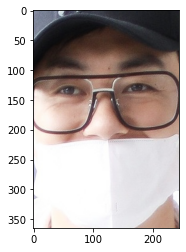

In [34]:
data = myresult[0][1]
b64_bytes = base64.b64encode(data)
b64_string = b64_bytes.decode()
#print(b64_bytes)
img = imread(io.BytesIO(base64.b64decode(b64_string)))
plt.figure()
plt.imshow(img, cmap="gray")
plt.show()

In [35]:
#print(img)

In [36]:
connection.commit()

In [37]:
connection.close()

# 2. Oracle SQL

In [38]:
import cx_Oracle

#dsn_tns = cx_Oracle.makedsn('Host Name', 'Port Number', service_name='Service Name') # if needed, place an 'r' before any parameter in order to address special characters such as '\'.
dsn_tns = cx_Oracle.makedsn('localhost', '1521', service_name='orcl') # if needed, place an 'r' before any parameter in order to address special characters such as '\'.
conn = cx_Oracle.connect(user=r'C##final', password='final', dsn=dsn_tns) # if needed, place an 'r' before any parameter in order to address special characters such as '\'. For example, if your user name contains '\', you'll need to place 'r' before the user name: user=r'User Name'

c = conn.cursor()

In [39]:
c.execute('delete from  method_processing') 
c.execute('delete from  original_image') 
c.execute('delete from  image_processing') 
conn.commit()

In [40]:
start=time.time()
for method in methods:
    print(method)
    value=(method,)
    c.execute( "INSERT INTO method_processing (name_method) VALUES (:0)",(method,))
end=time.time()
time_execution.append(end-start)

60
30
Flip
GaussianBlur
Brightness
channel_shift
noise_img


In [41]:
#print(end-start)

In [42]:
start=time.time()
c.execute('select * from  method_processing ') 
for row in c:
    print (row[0], '-', row[1])
end=time.time()
#print(end-start)
time_execution.append(end-start)

48 - 60
49 - 30
50 - Flip
51 - GaussianBlur
52 - Brightness
53 - channel_shift
54 - noise_img


In [43]:
conn.commit()

In [44]:
start=time.time()
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category,'origin')
    for img in os.listdir(path)[0:5]:
        #print(img)
        img_path = os.path.join(path, img)
        #print(img_path)
        image = convertToBinaryData(img_path)            
        c.execute( "INSERT INTO original_image (image,label_img) VALUES (:0,:1)",(image,category))
        
end=time.time()
#print(end-start)
time_execution.append(end-start)

In [45]:
start=time.time()
c.execute('select * from  original_image ') 
original_images=c.fetchall()
for row in original_images:
    print (row)
end=time.time()
#print(end-start)
time_execution.append(end-start)

(31, <cx_Oracle.LOB object at 0x0000026DD96705D0>, 'with_mask')
(32, <cx_Oracle.LOB object at 0x0000026DD9559D80>, 'with_mask')
(33, <cx_Oracle.LOB object at 0x0000026DDA83CEA0>, 'with_mask')
(34, <cx_Oracle.LOB object at 0x0000026DDA83CC60>, 'with_mask')
(35, <cx_Oracle.LOB object at 0x0000026DD977CDB0>, 'with_mask')
(36, <cx_Oracle.LOB object at 0x0000026DDA931990>, 'without_mask')
(37, <cx_Oracle.LOB object at 0x0000026DDA931F90>, 'without_mask')
(38, <cx_Oracle.LOB object at 0x0000026DDA9316C0>, 'without_mask')
(39, <cx_Oracle.LOB object at 0x0000026DDA931A20>, 'without_mask')
(40, <cx_Oracle.LOB object at 0x0000026DDA931F00>, 'without_mask')


In [46]:
time_summary.append(time_execution)
time_execution=[]

In [47]:
img= original_images[0][1].read()

In [48]:
#print(img)

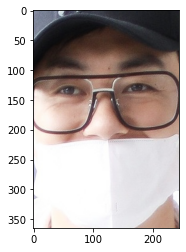

In [49]:
b64_bytes = base64.b64encode(img)
b64_string = b64_bytes.decode()
#print(b64_bytes)
img = imread(io.BytesIO(base64.b64decode(b64_string)))
plt.figure()
plt.imshow(img, cmap="gray")
plt.show()

In [50]:
conn.commit()

In [51]:
conn.close()

# 3. Mongodb

In [52]:
from pymongo import MongoClient

connection = MongoClient("localhost", 27017)

database = connection['final4013']

In [53]:
print(database.list_collection_names())


['image_processing', 'original_image', 'method_processing']


In [54]:
method_col = database["method_processing"]
original_image_col = database["original_image"]
image_processing_col = database["image_processing"]


In [55]:
method_col.delete_many({})
original_image_col.delete_many({})
image_processing_col.delete_many({})

In [56]:
start=time.time()
for method in methods:
    #print(i)
    name_method = {
        "name_method":method
        }
    method_col.insert_one(name_method)

end=time.time()
time_execution.append(end-start)
#print(end-start)


In [57]:
start=time.time()
cursor = method_col.find()
for record in cursor:
    print(record)
end=time.time()
#print(end-start)
time_execution.append(end-start)

{'_id': ObjectId('62bb1a7809b61fde9d7c3bf0'), 'name_method': '60'}
{'_id': ObjectId('62bb1a7809b61fde9d7c3bf1'), 'name_method': '30'}
{'_id': ObjectId('62bb1a7809b61fde9d7c3bf2'), 'name_method': 'Flip'}
{'_id': ObjectId('62bb1a7809b61fde9d7c3bf3'), 'name_method': 'GaussianBlur'}
{'_id': ObjectId('62bb1a7809b61fde9d7c3bf4'), 'name_method': 'Brightness'}
{'_id': ObjectId('62bb1a7809b61fde9d7c3bf5'), 'name_method': 'channel_shift'}
{'_id': ObjectId('62bb1a7809b61fde9d7c3bf6'), 'name_method': 'noise_img'}


In [58]:
start=time.time()
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category,'origin')
    for img in os.listdir(path)[0:5]:
        img_path = os.path.join(path, img)
        #print(img_path)
        #image = load_img(img_path)

        #print(image)
        image = convertToBinaryData(img_path)
        #thedata = open('thefile', 'rb').read()
        #print(image)
        or_image = {
        "image":image,
        "label":category,
        }
        original_image_col.insert_one(or_image)
end=time.time()
#print(end-start)
time_execution.append(end-start)

In [59]:
start=time.time()
original_images = original_image_col.find()
for record in original_images:
    #print(record['_id'])    
    print(record)
end=time.time()
#print(end-start)
time_execution.append(end-start)

{'_id': ObjectId('62bb1a7809b61fde9d7c3bf7'), 'image': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x01m\x00\xf5\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\

In [60]:
#print(end-start)

In [61]:
time_summary.append(time_execution)
time_execution=[]

In [62]:
original_images = list(original_image_col.find())

In [63]:
print(original_images[0]['image'])

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x01m\x00\xf5\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98

[[[134 142 161]
  [133 141 160]
  [133 140 159]
  ...
  [ 30  30  40]
  [ 31  31  41]
  [ 32  32  42]]

 [[134 142 161]
  [132 140 159]
  [141 148 167]
  ...
  [ 30  30  40]
  [ 30  30  40]
  [ 30  30  40]]

 [[138 145 164]
  [137 144 163]
  [130 137 156]
  ...
  [ 31  31  39]
  [ 31  31  39]
  [ 31  31  41]]

 ...

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [113  82  77]
  [120  91  87]
  [127  99  96]]

 [[253 253 253]
  [253 253 253]
  [252 252 252]
  ...
  [105  72  67]
  [120  89  86]
  [115  85  83]]

 [[254 252 253]
  [253 251 252]
  [253 251 252]
  ...
  [104  71  64]
  [115  84  81]
  [113  83  81]]]


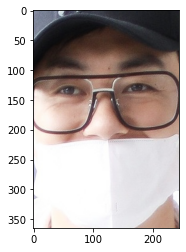

In [64]:
img =original_images[0]['image']
b64_bytes = base64.b64encode(img)
b64_string = b64_bytes.decode()

#print(img)
img = imread(io.BytesIO(base64.b64decode(b64_string)))
print(img)
plt.figure()
plt.imshow(img, cmap="gray")
plt.show()

In [65]:
#img =original_images[0]['image']
#b64_bytes = base64.b64encode(img)
#print()
#b64_string = b64_bytes.decode()
#print()


# time summarry

In [66]:
for i in time_summary:
    print(i)

[0.010991334915161133, 0.002001047134399414, 0.01999974250793457, 0.00600123405456543]
[0.004002094268798828, 0.0020017623901367188, 0.015003442764282227, 0.004004478454589844]
[0.015990257263183594, 0.0020012855529785156, 0.028997182846069336, 0.013994216918945312]


In [67]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# Convert image to binary

In [ ]:
import cv2
from io import BytesIO
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import skimage

DIRECTORY=os.getcwd()
CATEGORIES = ["with_mask", "without_mask"]

#filename = r"C:\Users\admin\Documents\dataset\with_mask\origin\10.jpg"

filename=os.path.join(DIRECTORY,CATEGORIES[0],'origin','10.jpg')

def bytes_to_ndarray(bytes):
    bytes_io = bytearray(bytes)
    img = Image.open(BytesIO(bytes_io))
    return np.array(img)


# skimage returns a ndarray with RGB ordering
#img_sk = skimage.data.astronaut()
img_sk=cv2.imread(filename)
#img_sk=original_images[0]['image']
img_sk=cv2.cvtColor(img_sk, cv2.COLOR_BGR2RGB)
# Opening a saved PNG file of this image using Pillow returns a ndarray with RGB ordering
img_pil = Image.open(filename)

# Opening a saved PNG file of this image using OpenCV returns a ndarray with BGR ordering

img_cv = cv2.imread(filename, cv2.IMREAD_COLOR)

# OpenCV uses BGR ordering, thus OpenCV's encoding treats img_sk[:, :, 0] as blue channel,
# although it's the actual red channel (the same for img_sk[:, :, 2]
# That means, the encoded byte stream now has BGR ordering!!
_, bytes = cv2.imencode('.png', img_sk)

# OpenCV uses BGR ordering, but OpenCV's decoding assumes a RGB ordered byte stream, so
# the blue and red channels are swapped again here, such that img_cv again is a ndarray with
# RGB ordering!!
img_byte_cv = cv2.imdecode(bytes, cv2.IMREAD_ANYCOLOR)
#img_byte_cv= cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
# Pillow uses RGB ordering, and also assumes a RGB ordered byte stream, but the actual byte
# stream is BGR ordered, such that img_pil actually is a ndarray with BGR ordering
img_byte_pil = bytes_to_ndarray(bytes)

# Matplotlib pyplot imshow uses RGB ordering for visualization!!
plt.figure(figsize=(8, 12))
plt.subplot(3, 2, 1), plt.imshow(img_pil), plt.ylabel('PNG loaded with Pillow')
plt.subplot(3, 2, 2), plt.imshow(img_cv), plt.ylabel('PNG loaded with OpenCV')
plt.subplot(3, 2, 3), plt.imshow(img_sk), plt.ylabel('Loaded with skimage')
plt.subplot(3, 2, 5), plt.imshow(img_byte_pil), plt.ylabel('Decoded with Pillow')
plt.subplot(3, 2, 6), plt.imshow(img_byte_cv), plt.ylabel('Decoded with OpenCV')
plt.show()

# unknow

In [ ]:
import os
os.sys.path
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise
import requests
import numpy as np
import random
import shutil
import glob
import time
import io
from tkinter import ttk
import base64
from imageio import imread,imwrite
import os
from PIL import Image

In [ ]:
DIRECTORY=os.getcwd()
CATEGORIES = ["with_mask", "without_mask"]

#filename = r"C:\Users\admin\Documents\dataset\with_mask\origin\10.jpg"

filename=os.path.join(DIRECTORY,CATEGORIES[0],'origin','10.jpg')
with open(filename, "rb") as fid:
    data = fid.read()
img = data
#print(data)
b64_bytes = base64.b64encode(img)
b64_string = b64_bytes.decode()
#print(img)
image = imread(io.BytesIO(base64.b64decode(b64_string)))
#print(image)
#plt.figure()
#plt.imshow(image, cmap="gray")
#plt.show()


In [ ]:
#image = cv2.imread(filename, 1)
#print(image)
image.shape

In [ ]:
retval, buffer = cv2.imencode('.jpg', image)
#print(buffer)
encode_image = base64.b64encode(buffer)
decoded_image = base64.b64decode(encode_image)
#print(decoded_image)

In [ ]:
b64_bytes = base64.b64encode(decoded_image)
b64_string = b64_bytes.decode()
#print(img)
#image = imread(io.BytesIO(base64.b64decode(b64_string)))
#print(image)
#plt.figure()
#plt.imshow(image, cmap="gray")
#plt.show()

In [ ]:
DIRECTORY=os.getcwd()
CATEGORIES = ["with_mask", "without_mask"]

#filename = r"C:\Users\admin\Documents\dataset\with_mask\origin\10.jpg"

filename=os.path.join(DIRECTORY,CATEGORIES[0],'origin','10.jpg')

im = Image.open(filename)
print(im.format)
img = np.array(im)
print(imgArray.shape)  
print(imgArray)

In [ ]:
retval, buffer = cv2.imencode('.'+im.format, imgArray)
#print(buffer)
encode_image = base64.b64encode(buffer)
decoded_image = base64.b64decode(encode_image)
#print(decoded_image)

In [ ]:
b64_bytes = base64.b64encode(decoded_image)
b64_string = b64_bytes.decode()
#print(img)
#image = imread(io.BytesIO(base64.b64decode(b64_string)))
#print(image)
#plt.figure()
#plt.imshow(image, cmap="gray")
#plt.show()

# reference
- https://appdividend.com/2020/06/23/how-to-convert-image-to-base64-string-in-python/
- https://stackoverflow.com/questions/58861577/differences-between-pil-image-open-and-cv2-imdecode
- https://note.nkmk.me/en/python-opencv-bgr-rgb-cvtcolor/

# tmp

In [ ]:
break 

In [ ]:
import base64
import io
import cv2
from imageio import imread
import matplotlib.pyplot as plt


In [ ]:

filename = r"C:\Users\admin\Documents\dataset\with_mask\origin\10.jpg"
with open(filename, "rb") as fid:
    data = fid.read()

#print(data)
b64_bytes = base64.b64encode(data)
b64_string = b64_bytes.decode()


# reconstruct image as an numpy array

img = imread(io.BytesIO(base64.b64decode(b64_string)))

# show image
plt.figure()
plt.imshow(img, cmap="gray")

# finally convert RGB image to BGR for opencv
# and save result
cv2_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#cv2.imwrite("reconstructed.jpg", cv2_img)
plt.show()

In [ ]:
try:
    connection = mysql.connector.connect(host='localhost',
                                         database='augmented',
                                         user='root',
                                         password='')

    cursor = connection.cursor()
        

except mysql.connector.Error as error:
    print("Failed inserting BLOB data into MySQL table {}".format(error))
    
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

In [ ]:
create table method_processing(
    id_method int(10) PRIMARY KEY AUTO_INCREMENT,
    name_method varchar(30) 
) ENGINE = InnoDB DEFAULT CHARSET = utf8mb4;

INSERT INTO
    method_processing (name_method) VALUES (name_method)


create table original_image(
    id_original_image int(10) PRIMARY KEY AUTO_INCREMENT,
    image LONGBLOB NOT NULL
) ENGINE = InnoDB DEFAULT CHARSET = utf8mb4;

INSERT INTO
    original_image (image) VALUES (image)

create table imageprocessing(
    id_original_image int(10) ,
    id_method int,
    image LONGBLOB NOT NULL,
    primary key (id_original_image, id_method),
    FOREIGN KEY (id_original_image) REFERENCES original_image(id_original_image),
    FOREIGN KEY (id_method) REFERENCES method_processing(id_method)

) ENGINE = InnoDB DEFAULT CHARSET = utf8mb4;

In [ ]:

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM customers")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

In [ ]:
import base64
import io
import cv2
from imageio import imread
import matplotlib.pyplot as plt

filename = "yourfile.jpg"
with open(filename, "rb") as fid:
    data = fid.read()

b64_bytes = base64.b64encode(data)
b64_string = b64_bytes.decode()

# reconstruct image as an numpy array
img = imread(io.BytesIO(base64.b64decode(b64_string)))

# show image
plt.figure()
plt.imshow(img, cmap="gray")

# finally convert RGB image to BGR for opencv
# and save result
cv2_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite("reconstructed.jpg", cv2_img)
plt.show()

In [ ]:
method=['60','30','Flip','GaussianBlur','Brightness','channel_shift','noise_img']
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category,'origin')
    save = os.path.join(DIRECTORY, category,'data management')
    if(os.path.exists(save)):
      shutil.rmtree(save)
    os.mkdir(save)
    for index in method:
      folder=os.path.join(save,index)
      if(os.path.exists(folder)):
        os.rmdir(folder)
      os.mkdir(folder)
    # print(os.listdir(path))
    for img in os.listdir(path):
      i=0
      # print(img)
      img_path = os.path.join(path, img)
      # print(img_path)
      image = load_img(img_path)
      

      #origin
      filename=save+'/'+method[i]+'_'+img
      filename=os.path.join(save,method[i],img)
      i=i+1
      cv2.imwrite(filename, image)
      #60
      rotate_60 =Rotate60(image) 
      filename=os.path.join(save,method[i],img)
      i=i+1
      cv2.imwrite(filename, rotate_60)
      #30
      rotate_30 =Rotate30(image) 

      filename=os.path.join(save,method[i],img)
      i=i+1
      cv2.imwrite(filename, rotate_30)

      # # Use Flip code 1 to flip vertically
      img_flip = cv2.flip(image, 1)
      filename=os.path.join(save,method[i],img)
      i=i+1
      cv2.imwrite(filename, img_flip)

      #GaussianBlur
      # dst = cv2.GaussianBlur(img,(10,10),cv2.BORDER_DEFAULT)
      blur_image = cv2.GaussianBlur(image, (9,9), 5)

      filename=os.path.join(save,method[i],img)
      i=i+1
      cv2.imwrite(filename, blur_image) 

      #Brightness

      Brightness = brightness(image)

      filename=os.path.join(save,method[i],img)
      i=i+1
      cv2.imwrite(filename, Brightness)

      #channel_shift


      channelshift = channel_shift(image)

      filename=os.path.join(save,method[i],img)
      i=i+1
      cv2.imwrite(filename, channelshift)

      # Add salt-and-pepper noise to the image.
      noise_img = random_noise(image, mode='s&p',amount=0.5)

      filename=os.path.join(save,method[i],img)
      i=i+1
      cv2.imwrite(filename, noise_img)

      # The above function returns a floating-point image
      # on the range [0, 1], thus we changed it to 'uint8'
      # and from [0,255]
      noise_img = np.array(255*noise_img, dtype = 'uint8')



In [ ]:
#https://sqlserverguides.com/how-to-store-images-in-mongodb/
#https://datatofish.com/how-to-connect-python-to-an-oracle-database-using-cx_oracle/

# xampp

In [ ]:
create table method_processing(
    id_method int PRIMARY KEY AUTO_INCREMENT,
    name_method varchar(30) 
) ENGINE = InnoDB DEFAULT CHARSET = utf8mb4;

-- INSERT INTO  method_processing (name_method) VALUES (name_method)



create table original_image(
    id_original_image int PRIMARY KEY AUTO_INCREMENT,
    image LONGBLOB NOT NULL,
    label_img varchar(20) not null
) ENGINE = InnoDB DEFAULT CHARSET = utf8mb4;
 
    
-- INSERT INTO  original_image (image,label_img) VALUES (image,label_img)
    
    
create table image_processing(
    id_original_image int ,
    id_method int,
    image LONGBLOB NOT NULL,
    primary key (id_original_image, id_method),
    FOREIGN KEY (id_original_image) REFERENCES original_image(id_original_image),
    FOREIGN KEY (id_method) REFERENCES method_processing(id_method)

) ENGINE = InnoDB DEFAULT CHARSET = utf8mb4;

# oracle 

In [ ]:

CREATE DIRECTORY database_augmented AS 'C:\Users\admin\Documents\database_augmented';


create table method_processing(
    id_method number(10) PRIMARY KEY,
    name_method varchar(30) 
);

CREATE SEQUENCE method_SEQ;


-- create tigger using the sequence
CREATE OR REPLACE TRIGGER method_TRG 
BEFORE INSERT ON method_processing 
FOR EACH ROW
WHEN (new.id_method IS NULL)
BEGIN
  SELECT method_SEQ.NEXTVAL
  INTO   :new.id_method
  FROM   dual;
END;



--INSERT INTO method_processing (name_method) VALUES ('a');


commit;

  

  
  
create table original_image(
    id_original_image number(10) PRIMARY KEY ,
    image bfile NOT NULL
);

CREATE SEQUENCE original_image_SEQ;


-- create tigger using the sequence
CREATE OR REPLACE TRIGGER original_image_TRG 
BEFORE INSERT ON original_image 
FOR EACH ROW
WHEN (new.id_original_image IS NULL)
BEGIN
  SELECT original_image_SEQ.NEXTVAL
  INTO   :new.id_original_image
  FROM   dual;
END;



create table imageprocessing(
    id_original_image number(10) ,
    id_method number(10),
    image bfile NOT NULL,
    primary key (id_original_image, id_method),
    FOREIGN KEY (id_original_image) REFERENCES original_image(id_original_image),
    FOREIGN KEY (id_method) REFERENCES method_processing(id_method)

);






INSERT INTO print_media (product_id, ad_id, ad_graphic)
   VALUES (3000, 31001, 
      BFILENAME('MEDIA_DIR', 'modem_comp_ad.gif'));